## Authentication + string hyperlinks and survey urls

In [1]:
import gspread
from IPython.display import display
import time
import matplotlib.pyplot as plt
import playsound

gc = gspread.service_account(filename=r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\client_secret.json')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials

# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)

names = ['Survey 1 (Responses)',
'Survey 2 (Responses)',
'Survey 3 (Responses)',
'Survey 4 (Responses)',
'Survey 5 (Responses)',
'Survey 6 (Responses)']

import matplotlib
plt.style.use('seaborn-whitegrid')

matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['font.family'] = 'sans-serif'

## Building master dataframe from the survey builder

In [2]:
print("Opening master spreadsheet")    
sh  = gc.open('Survey builder')
worksheet = sh.sheet1


questions = worksheet.col_values(6)
questions.pop(0)
correct_answers = worksheet.col_values(2)
correct_answers.pop(0)
snr = worksheet.col_values(20)
snr.pop(0)

#del dict

dict = {'Questions from master' : [],
        'correct value' : [],
        'snr' : []}
df = pd.DataFrame(dict)

for i in range(0,54):
    df = df.append({'Questions from master':questions[i],
                  'correct value':correct_answers[i],
                  'snr':snr[i]},
                  ignore_index=True)

df_master = df    

display(df_master)

#del df_sound ## May need a command of this type to delete entries and recompile databases
#del df_visual
#del df_video

df_sound = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         'σ': [],
                         'SNR': [],})
display(df_sound)

df_visual = pd.DataFrame({'Name': [],
                          'Correct n': [],
                          'Number of correct answers': [],
                          'Total responses': [],
                          'σ': [],
                          'SNR': [],})
display(df_visual)

df_video = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         'σ': [],
                         'SNR': [],})
display(df_video)

Opening master spreadsheet


,Questions from master,correct value,snr
0,Here is the link to sonification 91: https://d...,1,3
1,Here is the link to video 110: https://drive.g...,0,3
2,Here is the link to plot 111: https://drive.go...,0,10
3,Here is the link to plot 71: https://drive.goo...,2,100
4,Here is the link to sonification 174: https://...,0,100
5,Here is the link to sonification 49: https://d...,2,5
6,Here is the link to plot 91: https://drive.goo...,1,3
7,Here is the link to sonification 10: https://d...,1,30
8,Here is the link to sonification 64: https://d...,1,10
9,Here is the link to video 49: https://drive.go...,2,5


,Name,Correct n,Number of correct answers,Total responses,σ,SNR


,Name,Correct n,Number of correct answers,Total responses,σ,SNR


,Name,Correct n,Number of correct answers,Total responses,σ,SNR


Sorting into the three databases from the master spreadsheet.

In [3]:
substringsoni = "sonification"
substringvid = "video"
substringplot = "plot"

substrings_array = [substringsoni,substringvid,substringplot]

def sorting_hat(i, substring): ## Call this over range of i, over each substring to sort all the data
    
    query = df_master['Questions from master'] 
    
    if substring in query[i]: 
        
        print("I found", substring, "at entry", i+1,"in database")
        
        if substring == "sonification":
            
            global df_sound
            
            df_sound = df_sound.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        'σ': '',
                                        'SNR':snr[i]},ignore_index=True)
            
        elif substring == "plot":
            
            global df_visual
            
            df_visual = df_visual.append({'Name':query[i],
                                          'Correct n':correct_answers[i],
                                          'Number of correct answers': '',
                                          'Total responses': '',
                                          'σ': '',
                                          'SNR':snr[i]},ignore_index=True)
            
        else:
        
            global df_video
            
            df_video = df_video.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        'σ': '',
                                        'SNR':snr[i]},ignore_index=True)

for i in range(0,len(df_master['Questions from master'])):
    
    for x in substrings_array:    
        
        sorting_hat(i,x)
    
display(df_sound,df_visual,df_video)
print("Sanity check",len(df_sound['Name'])+len(df_visual['Name'])+len(df_video['Name']))

I found sonification at entry 1 in database
I found video at entry 2 in database
I found plot at entry 3 in database
I found plot at entry 4 in database
I found sonification at entry 5 in database
I found sonification at entry 6 in database
I found plot at entry 7 in database
I found sonification at entry 8 in database
I found sonification at entry 9 in database
I found video at entry 10 in database
I found sonification at entry 11 in database
I found plot at entry 12 in database
I found sonification at entry 13 in database
I found plot at entry 14 in database
I found sonification at entry 15 in database
I found plot at entry 16 in database
I found plot at entry 17 in database
I found plot at entry 18 in database
I found video at entry 19 in database
I found video at entry 20 in database
I found sonification at entry 21 in database
I found video at entry 22 in database
I found plot at entry 23 in database
I found sonification at entry 24 in database
I found sonification at entry 25 in 

,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to sonification 91: https://d...,1,,,,3
1,Here is the link to sonification 174: https://...,0,,,,100
2,Here is the link to sonification 49: https://d...,2,,,,5
3,Here is the link to sonification 10: https://d...,1,,,,30
4,Here is the link to sonification 64: https://d...,1,,,,10
5,Here is the link to sonification 168: https://...,0,,,,30
6,Here is the link to sonification 36: https://d...,2,,,,30
7,Here is the link to sonification 17: https://d...,1,,,,5
8,Here is the link to sonification 111: https://...,0,,,,10
9,Here is the link to sonification 71: https://d...,2,,,,100


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to plot 111: https://drive.go...,0,,,,10
1,Here is the link to plot 71: https://drive.goo...,2,,,,100
2,Here is the link to plot 91: https://drive.goo...,1,,,,3
3,Here is the link to plot 161: https://drive.go...,0,,,,7
4,Here is the link to plot 28: https://drive.goo...,1,,,,7
5,Here is the link to plot 49: https://drive.goo...,2,,,,5
6,Here is the link to plot 110: https://drive.go...,0,,,,3
7,Here is the link to plot 15: https://drive.goo...,2,,,,7
8,Here is the link to plot 64: https://drive.goo...,1,,,,10
9,Here is the link to plot 17: https://drive.goo...,1,,,,5


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to video 110: https://drive.g...,0,,,,3
1,Here is the link to video 49: https://drive.go...,2,,,,5
2,Here is the link to video 91: https://drive.go...,1,,,,3
3,Here is the link to video 64: https://drive.go...,1,,,,10
4,Here is the link to video 15: https://drive.go...,2,,,,7
5,Here is the link to video 28: https://drive.go...,1,,,,7
6,Here is the link to video 18: https://drive.go...,2,,,,3
7,Here is the link to video 36: https://drive.go...,2,,,,30
8,Here is the link to video 59: https://drive.go...,1,,,,100
9,Here is the link to video 174: https://drive.g...,0,,,,100


Sanity check 54


## Weighting data

In [5]:
#del dict

dict = {'Astronomy proficiency/4' : [],
        'Data analysis proficiency/4' : [],
        'Music proficiency/4' : [],
        'Visual impairment Y/N' : []}
weighting_matrix = pd.DataFrame(dict)

def weighting_function(survey_sheet):

    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    # Extracting the weighting values for proficiency and appending to a database with a tag
    
    astro = worksheet.col_values(2)
    astro.pop(0)

    data = worksheet.col_values(3)
    data.pop(0)
    
    music = worksheet.col_values(4)
    music.pop(0)
    
    yn = worksheet.col_values(5)
    yn.pop(0)
    
    for i in range(0,len(astro)):
        
        global weighting_matrix
            
        weighting_matrix = weighting_matrix.append({'Astronomy proficiency/4' : [astro[i]],
                                             'Data analysis proficiency/4' : [data[i]],
                                             'Music proficiency/4' : [music[i]],
                                             'Visual impairment Y/N' : [yn[i]]},
                                             ignore_index=True)
        
        
for x in names:

    weighting_function(x)

# Obtain a matrix with dimensions (number of responses) by 4.
# Can also count the number of responses, and how many visually impaired users took the survey.
    
display(weighting_matrix)
print(len(weighting_matrix['Astronomy proficiency/4']),
      "responses")

,Astronomy proficiency/4,Data analysis proficiency/4,Music proficiency/4,Visual impairment Y/N
0,[4],[4],[1],[No]
1,[4],[4],[1],[No]
2,[4],[4],[],[No]
3,[4],[4],[2],[No]
4,[4],[4],[4],[No]
...,...,...,...,...
149,[1],[1],[4],[No]
150,[4],[4],[1],[No]
151,[4],[4],[3],[No]
152,[1],[4],[1],[Yes]


154 responses


Doing some analysis of demographics with the weighting matrix data

5.844155844155844 % of users identified as having visual impairment
[4]    0.798701
[1]    0.129870
[3]    0.064935
[2]    0.006494
Name: Astronomy proficiency/4, dtype: float64
[4]    0.876623
[2]    0.058442
[1]    0.038961
[3]    0.025974
Name: Data analysis proficiency/4, dtype: float64
[1]    0.512987
[2]    0.240260
[3]    0.129870
[4]    0.110390
[]     0.006494
Name: Music proficiency/4, dtype: float64


Text(0, 0.5, 'Percentage of users')

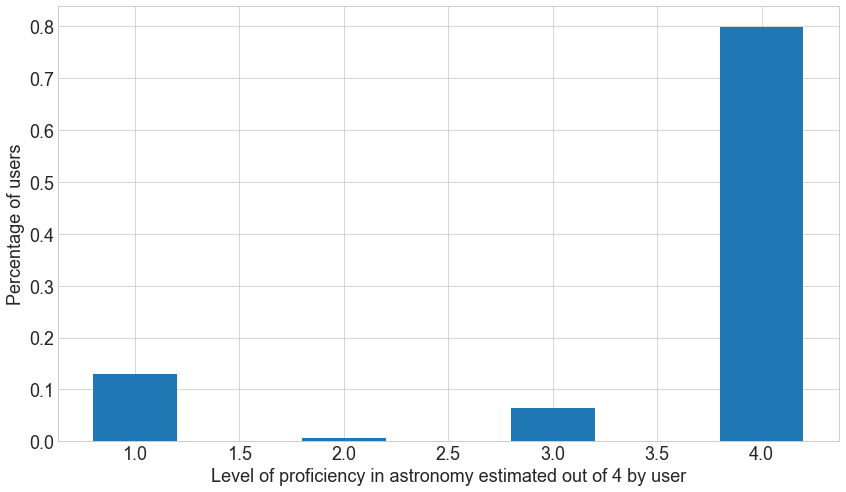

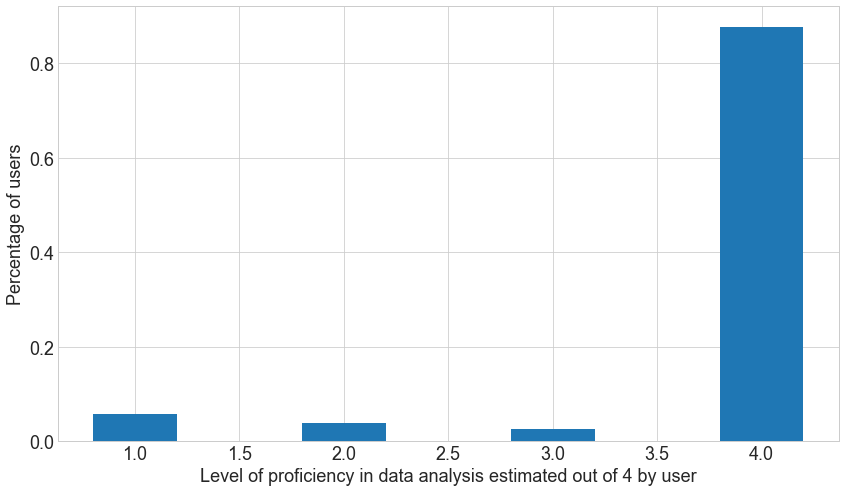

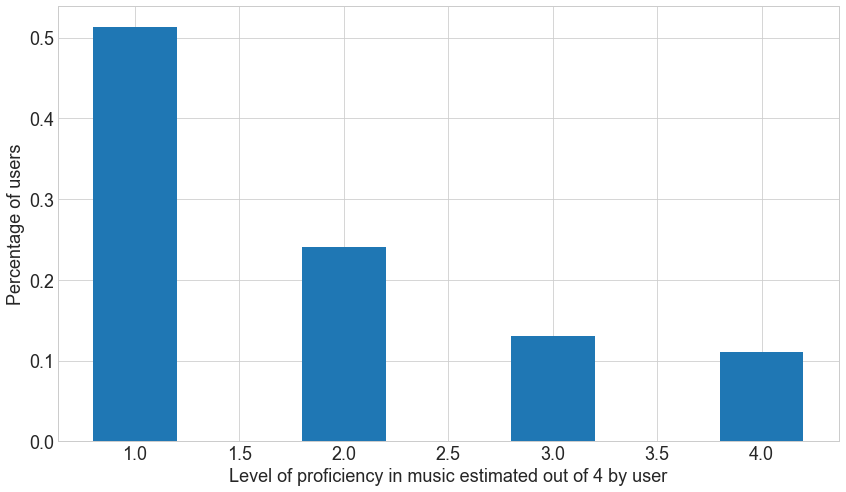

In [6]:
impair = weighting_matrix['Visual impairment Y/N'].value_counts(normalize=True,sort=True, ascending=True)
print(impair[0]*100.0,"% of users identified as having visual impairment")
#----------------------------------------------------------------------------------------------------
astroprof = weighting_matrix['Astronomy proficiency/4'].value_counts(normalize=True)
print(astroprof)
astroprof_x = np.linspace(1,4,4)
astroprof_y = [astroprof[1],astroprof[3],astroprof[2],astroprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(astroprof_x,astroprof_y,width=0.4)
#plt.plot(astroprof_x,astroprof_y,'b.')
plt.xlabel("Level of proficiency in astronomy estimated out of 4 by user")
plt.ylabel("Percentage of users")

#----------------------------------------------------------------------------------------------------
dataprof = weighting_matrix['Data analysis proficiency/4'].value_counts(normalize=True)
print(dataprof)
dataprof_x = np.linspace(1,4,4)
dataprof_y = [dataprof[1],dataprof[2],dataprof[3],dataprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(dataprof_x,dataprof_y,width=0.4)
plt.xlabel("Level of proficiency in data analysis estimated out of 4 by user")
plt.ylabel("Percentage of users")

#----------------------------------------------------------------------------------------------------
musicprof = weighting_matrix['Music proficiency/4'].value_counts(normalize=True)
print(musicprof)
musicprof_x = np.linspace(1,4,4)
musicprof_y = [musicprof[0],musicprof[1],musicprof[2],musicprof[3]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(musicprof_x,musicprof_y,width=0.4)
plt.xlabel("Level of proficiency in music estimated out of 4 by user")
plt.ylabel("Percentage of users")

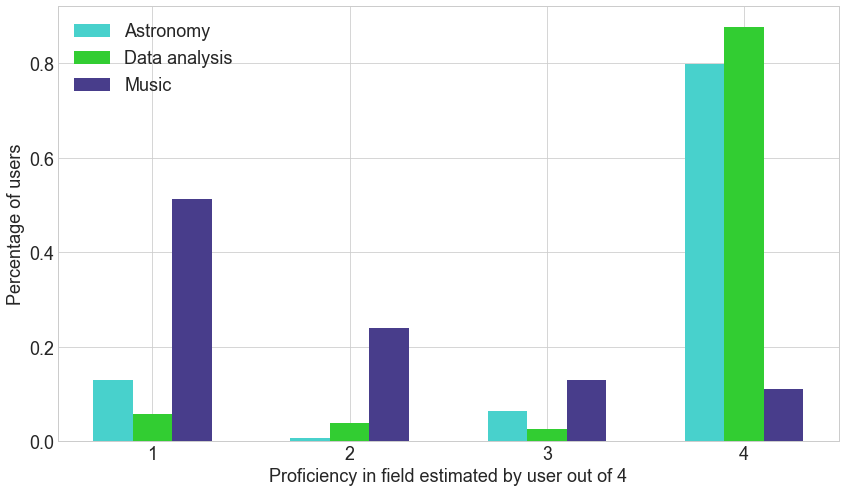

In [7]:
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar(astroprof_x-0.2, astroprof_y, width=0.2, color='mediumturquoise', align='center',label='Astronomy')
ax.bar(dataprof_x, dataprof_y, width=0.2, color='limegreen', align='center',label='Data analysis')
ax.bar(musicprof_x+0.2, musicprof_y, width=0.2, color='darkslateblue', align='center',label='Music')
ax.set_xlabel("Proficiency in field estimated by user out of 4")
ax.set_ylabel("Percentage of users")
ax.legend(loc='best')

plt.xticks([1,2,3,4])
plt.gcf()
plt.savefig("Combined bar chart of demographics.jpg")

## Data sorting and database creation

In [8]:
def sorting_hat_success(query,success,responses,err):

    global df_sound 
    global df_visual
    global df_video

    if "sonification" in query: # question contains substring
        
        col = df_sound['Name']
    
        for i in range(0,len(col)):
            
            cell = df_sound.iloc[i]['Name']
            
            if query in cell:
                
                df_sound.at[i,'Number of correct answers'] = df_sound.at[i,'Number of correct answers'].replace('',str(success))
                df_sound.at[i,'Total responses'] = df_sound.at[i,'Total responses'].replace('',str(responses))
                df_sound.at[i,'σ'] = df_sound.at[i,'σ'].replace('',str(err))
                
    elif "plot" in query:

        col = df_visual['Name']
    
        for i in range(0,len(col)):
            
            cell = df_visual.iloc[i]['Name']
            
            if query in cell:
                
                df_visual.at[i,'Number of correct answers'] = df_visual.at[i,'Number of correct answers'].replace('',str(success))
                df_visual.at[i,'Total responses'] = df_visual.at[i,'Total responses'].replace('',str(responses))
                df_visual.at[i,'σ'] = df_visual.at[i,'σ'].replace('',str(err))
                
    else:

        col = df_video['Name']
    
        for i in range(0,len(col)):
            
            cell = df_video.iloc[i]['Name']
            
            if query in cell:
                
                df_video.at[i,'Number of correct answers'] = df_video.at[i,'Number of correct answers'].replace('',str(success))
                df_video.at[i,'Total responses'] = df_video.at[i,'Total responses'].replace('',str(responses))
                df_video.at[i,'σ'] = df_video.at[i,'σ'].replace('',str(err))

Cross reference the correct response and calculates the success rate in identifying with associated error

In [9]:
def filter_float(arr):
    
    output = []
    
    for i in arr:
        
        if len(i) == 0:
            arr.remove(i)
        elif len(i) == 41:
            arr.remove(i)
        else:
            output.append(i)
            
    return output    
    #print("filtered array",output)
        

In [10]:
sample = ['1','1','2','3','','N/A (unable to analyze the plot visually)']
filter_float(sample)

['1', '1', '2', '3']

In [11]:
def search_function(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1

    print("I opened", survey_sheet)
    print("")

    global success_rates
    global snr

    success_rates = []
    snr = []

    for i in range(6,15):
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question
        
        for j in range(0,len(df_master['Questions from master'])):

            if df_master.iloc[j]['Questions from master'] == question:
                #print("I found",question,"in the master")
                #print("It's value of snr is",df_master.iloc[j]['snr'])
                #print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                #print("The responses were",responses)
                
                sigma = np.std(np.array(filter_float(responses)).astype(np.float))
                #print("sigma",sigma)
                
                bool_list = []
                #poss_answer = [str(0),str(1),str(2),str(3),str(4)]

                #print("Had this number of responses",len(responses))

                ## Search across the three databases for the relevant string, then once found
                ## search for the relevant snr. 

                for k in responses: ## Success rate calculation here
                
                        test = list(map(lambda x, y: x == y, df_master.iloc[j]['correct value'], k))
                        bool_list = bool_list + test

                #print(bool_list)

                true_count = sum(bool_list)
                #print("got a true count of ",true_count)
                #print("got",len(responses),"responses")
                perc = true_count/len(bool_list)*100.0

                sorting_hat_success(question,true_count,len(responses),sigma)

            else:
                continue
                
for x in names:
    search_function(x)
    #time.sleep(3)

print("Responses and correct answers calculated")

#print(success_rates,snr)

I opened Survey 1 (Responses)

I opened Survey 2 (Responses)

I opened Survey 3 (Responses)

I opened Survey 4 (Responses)

I opened Survey 5 (Responses)

I opened Survey 6 (Responses)

Responses and correct answers calculated


See sorted dataframes with extracted response data below

In [12]:
display(df_sound,df_visual,df_video)

,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to sonification 91: https://d...,1,1,32,1.19528696868158,3
1,Here is the link to sonification 174: https://...,0,25,32,1.117597171390479,100
2,Here is the link to sonification 49: https://d...,2,3,32,1.3488276159317023,5
3,Here is the link to sonification 10: https://d...,1,28,32,0.45821494683172437,30
4,Here is the link to sonification 64: https://d...,1,10,32,0.7071067811865476,10
5,Here is the link to sonification 168: https://...,0,21,27,1.0469736606781692,30
6,Here is the link to sonification 36: https://d...,2,26,28,0.421065218662557,30
7,Here is the link to sonification 17: https://d...,1,3,28,0.6998542122237652,5
8,Here is the link to sonification 111: https://...,0,13,21,1.1388819755334665,10
9,Here is the link to sonification 71: https://d...,2,20,21,0.42591770999996,100


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to plot 111: https://drive.go...,0,23,28,1.11725730648266,10
1,Here is the link to plot 71: https://drive.goo...,2,29,32,0.5294085733155443,100
2,Here is the link to plot 91: https://drive.goo...,1,0,29,1.3636229154796797,3
3,Here is the link to plot 161: https://drive.go...,0,22,23,0.0,7
4,Here is the link to plot 28: https://drive.goo...,1,26,27,0.1923076923076923,7
5,Here is the link to plot 49: https://drive.goo...,2,12,28,0.8835226340609272,5
6,Here is the link to plot 110: https://drive.go...,0,24,27,0.31948553318915673,3
7,Here is the link to plot 15: https://drive.goo...,2,16,28,0.6776309271789385,7
8,Here is the link to plot 64: https://drive.goo...,1,13,21,0.6834619092574915,10
9,Here is the link to plot 17: https://drive.goo...,1,2,20,0.3068922049918579,5


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to video 110: https://drive.g...,0,23,32,1.3331705629813464,3
1,Here is the link to video 49: https://drive.go...,2,11,28,1.0666560373620055,5
2,Here is the link to video 91: https://drive.go...,1,0,21,1.0389249632986395,3
3,Here is the link to video 64: https://drive.go...,1,15,21,0.4994327848429293,10
4,Here is the link to video 15: https://drive.go...,2,15,21,0.7315376902732008,7
5,Here is the link to video 28: https://drive.go...,1,15,21,0.5259695722470125,7
6,Here is the link to video 18: https://drive.go...,2,0,29,0.9252695079309474,3
7,Here is the link to video 36: https://drive.go...,2,29,29,0.0,30
8,Here is the link to video 59: https://drive.go...,1,29,29,0.0,100
9,Here is the link to video 174: https://drive.g...,0,26,28,0.5902732389077491,100


Sort by transit_n

In [13]:
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

str_df = [get_df_name(df_sound),get_df_name(df_visual),get_df_name(df_video)]
print(str_df)

sets = pd.DataFrame({'Data':[df_sound,df_visual,df_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets['Data']:
    sort(x)
    display(x)

['df_sound', 'df_visual', 'df_video']


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
8,Here is the link to sonification 111: https://...,0,13,21,1.1388819755334665,10
14,Here is the link to sonification 161: https://...,0,19,22,0.8731533051044794,7
10,Here is the link to sonification 123: https://...,0,17,21,0.39267672624930106,5
5,Here is the link to sonification 168: https://...,0,21,27,1.0469736606781692,30
17,Here is the link to sonification 110: https://...,0,17,22,0.93706946036765,3
1,Here is the link to sonification 174: https://...,0,25,32,1.117597171390479,100
3,Here is the link to sonification 10: https://d...,1,28,32,0.45821494683172437,30
7,Here is the link to sonification 17: https://d...,1,3,28,0.6998542122237652,5
16,Here is the link to sonification 59: https://d...,1,22,22,0.0,100
12,Here is the link to sonification 28: https://d...,1,9,28,0.5543196128553988,7


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to plot 111: https://drive.go...,0,23,28,1.11725730648266,10
14,Here is the link to plot 174: https://drive.go...,0,18,21,1.178030178747903,100
13,Here is the link to plot 123: https://drive.go...,0,18,21,0.9539392014169457,5
3,Here is the link to plot 161: https://drive.go...,0,22,23,0.0,7
6,Here is the link to plot 110: https://drive.go...,0,24,27,0.31948553318915673,3
16,Here is the link to plot 168: https://drive.go...,0,17,19,0.9682458365518543,30
12,Here is the link to plot 59: https://drive.goo...,1,20,22,0.30151134457776363,100
10,Here is the link to plot 10: https://drive.goo...,1,29,29,0.0,30
9,Here is the link to plot 17: https://drive.goo...,1,2,20,0.3068922049918579,5
8,Here is the link to plot 64: https://drive.goo...,1,13,21,0.6834619092574915,10


,Name,Correct n,Number of correct answers,Total responses,σ,SNR
0,Here is the link to video 110: https://drive.g...,0,23,32,1.3331705629813464,3
15,Here is the link to video 111: https://drive.g...,0,19,22,0.6695872664843745,10
12,Here is the link to video 168: https://drive.g...,0,16,22,1.320530822393995,30
11,Here is the link to video 161: https://drive.g...,0,28,28,0.0,7
10,Here is the link to video 123: https://drive.g...,0,27,29,0.7459761259580665,5
9,Here is the link to video 174: https://drive.g...,0,26,28,0.5902732389077491,100
14,Here is the link to video 10: https://drive.go...,1,21,21,0.0,30
13,Here is the link to video 17: https://drive.go...,1,1,22,0.8491609860122458,5
8,Here is the link to video 59: https://drive.go...,1,29,29,0.0,100
5,Here is the link to video 28: https://drive.go...,1,15,21,0.5259695722470125,7


## Success rate calculation

n = 0 data

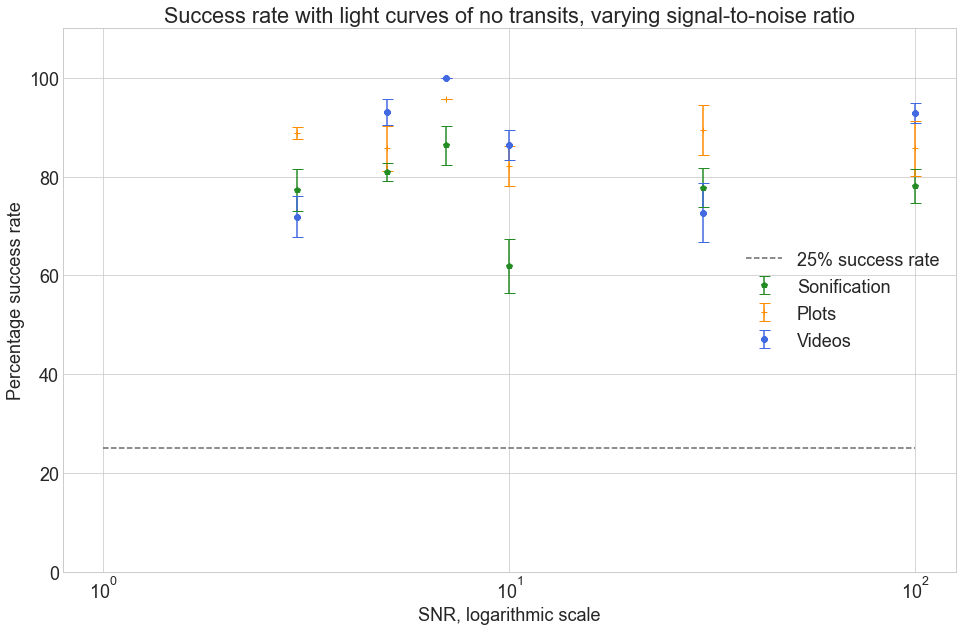

In [14]:
#plt.style.use('dark_background')
n0_snr_sound = []
n0_snr_visual = []
n0_snr_video = []

n0_success_sound = []
n0_success_sound_err = []

n0_success_visual = []
n0_success_visual_err = []

n0_success_video = []
n0_success_video_err = []

for i in sets['Data']:
    
    j = i.iloc[0:6]
    #display(j)
    #j['Success rate'] = ['','','','','','']
    
    for k in range(0,len(j['Name'])):
        suc = float(j.iloc[k]['Number of correct answers'])/float(j.iloc[k]['Total responses'])
        #print(suc)
        err = float(j.iloc[k]['σ'])/float(j.iloc[k]['Total responses'])
        
        if "sonification" in j.iloc[0]['Name']: 

            global n0_snr_sound
            global n0_success_sound

            n0_snr_sound.append(float(j.iloc[k]['SNR']))
            n0_success_sound.append(suc*100.0)
            n0_success_sound_err.append(err*100.0)
    
        elif "plot" in j.iloc[0]['Name']: 

            global n0_snr_visual
            global n0_success_visual

            n0_snr_visual.append(float(j.iloc[k]['SNR']))
            n0_success_visual.append(suc*100.0)
            n0_success_visual_err.append(err*100.0)
            
        else:

            global n0_snr_video
            global n0_success_video

            n0_snr_video.append(float(j.iloc[k]['SNR']))
            n0_success_video.append(suc*100.0)
            n0_success_video_err.append(err*100.0)

f, ax = plt.subplots(figsize=(16, 10))

plt.errorbar(n0_snr_sound,n0_success_sound,yerr=n0_success_sound_err,xerr=None,
             color = 'forestgreen', linestyle="None", marker='p', capsize=5.5, label='Sonification')
plt.errorbar(n0_snr_visual,n0_success_visual,yerr=n0_success_visual_err,xerr=None,
             color='darkorange', linestyle="None", marker='+', capsize=5.5, label='Plots')
plt.errorbar(n0_snr_video,n0_success_video,yerr=n0_success_video_err,xerr=None,
             color='royalblue', linestyle="None", marker='8', capsize=5.5, label='Videos')
plt.hlines(25, 1, 100, colors='k', linestyles='dashed', label='25% success rate',color='dimgray')
plt.xscale("log")
plt.legend(loc="center right")#,fontsize='xx-large')
ax.set_ylim(0,110)
ax.set_xlabel("SNR, logarithmic scale")
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate with light curves of no transits, varying signal-to-noise ratio")

plt.savefig("n = 0 transits prelim")

n = 1 and n = 2 data 

<ipython-input-20-6d6fa835caf0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.sort_values(by=['SNR'], ascending=True,inplace=True)
<ipython-input-20-6d6fa835caf0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j['Combined number of correct answers'] = ''
<ipython-input-20-6d6fa835caf0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

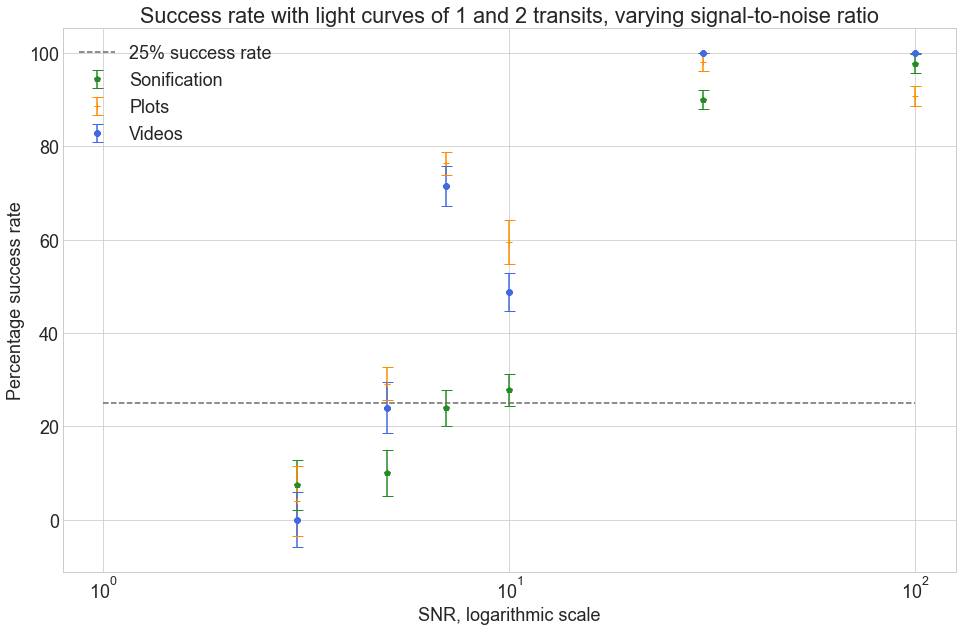

In [20]:
n12_snr_sound = []
n12_snr_visual = []
n12_snr_video = []

n12_success_sound = []
n12_success_sound_err = []

n12_success_visual = []
n12_success_visual_err = []

n12_success_video = []
n12_success_video_err = []

collate = [n12_snr_sound,n12_snr_video,n12_snr_visual,
           n12_success_sound,n12_success_video,n12_success_visual]

for i in sets['Data']:
    
    j = i.iloc[6:18]
    j.sort_values(by=['SNR'], ascending=True,inplace=True)
    
    j['Combined number of correct answers'] = ''
    j['Combined total'] = ''
    
    #display(j)
    
    for k in range(0,len(j['Number of correct answers']),2):
        
        correct = (float(j.iloc[k]['Number of correct answers']))+float(j.iloc[k+1]['Number of correct answers'])
        #print("correct",correct)
        tot = (float(j.iloc[k]['Total responses'])+float(j.iloc[k+1]['Total responses']))           
        #print("tot",tot)
        suc = correct/tot
        err_k = float(j.iloc[k]['σ'])/float(j.iloc[k]['Total responses'])
        err_kplus = float(j.iloc[k+1]['σ'])/float(j.iloc[k+1]['Total responses'])
        #print(suc)
        err = np.sqrt(err_k**2 + err_kplus**2)
        
        if "sonification" in j.iloc[0]['Name']: 

            global n12_snr_sound
            global n12_success_sound

            n12_snr_sound.append(float(j.iloc[k]['SNR']))
            n12_success_sound.append(suc*100.0)
            n12_success_sound_err.append(err*100.0)

        elif "plot" in j.iloc[0]['Name']: 

            global n12_snr_visual
            global n12_success_visual

            n12_snr_visual.append(float(j.iloc[k]['SNR']))
            n12_success_visual.append(suc*100.0)
            n12_success_visual_err.append(err*100.0)
            
        else:

            global n12_snr_video
            global n12_success_video

            n12_snr_video.append(float(j.iloc[k]['SNR']))
            n12_success_video.append(suc*100.0)
            n12_success_video_err.append(err*100.0)
        
f, ax = plt.subplots(figsize=(16, 10))
plt.errorbar(n12_snr_sound,n12_success_sound,yerr=n12_success_sound_err,xerr=None,
             color = 'forestgreen', linestyle="None", marker='p', capsize=5.5, label='Sonification')
plt.errorbar(n12_snr_visual,n12_success_visual,yerr=n12_success_visual_err,xerr=None,
             color='darkorange', linestyle="None", marker='+', capsize=5.5, label='Plots')
plt.errorbar(n12_snr_video,n12_success_video,yerr=n12_success_video_err,xerr=None,
             color='royalblue', linestyle="None", marker='8', capsize=5.5, label='Videos')
plt.xscale("log")
plt.hlines(25, 1, 100, colors='k', linestyles='dashed', label='25% success rate',color='dimgray')
plt.legend(loc="best")
ax.set_xlabel("SNR, logarithmic scale")
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate with light curves of 1 and 2 transits, varying signal-to-noise ratio")
plt.savefig("combinedn1n2.jpg")

#print(n12_snr_sound)
#print(n12_snr_visual)
#print(n12_snr_video)
#print(n12_success_sound)
#print(n12_success_visual)
#print(n12_success_video)
#print(collate)    

## Response rate against time

In [16]:
from datetime import datetime
import random

In [17]:
timestamp = pd.DataFrame({'Time': [],
                          'Day': []})

freq = pd.DataFrame({'Day': [],
                     'Frequency':[]})

def response(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    print("I opened", survey_sheet)
    print("")
    
    timecol = worksheet.col_values(1,0)
    timecol.pop(0)
    
    freq = []
    day = []
    
    global timestamp
    
    for idx in timecol:
        
        date_time_obj = datetime.strptime(idx, '%m/%d/%Y %H:%M:%S')
        timestamp = timestamp.append({'Time' : [date_time_obj],
                                      'Day' : float(date_time_obj.strftime('%d'))-21.0},
                                      ignore_index = 'True')
        
    #display(timestamp)
    
    if survey_sheet == 'Survey 6 (Responses)':
        
        string = 'test' + str(random.randint(1,5)) + '.xlsx'
        freq = timestamp['Day'].value_counts(normalize=True, sort=True, ascending=True)
        timestamp.to_excel(string, sheet_name='sheet1', index=False)
        
for x in names:
    response(x)
    
print("Finished timestamping")

I opened Survey 1 (Responses)

I opened Survey 2 (Responses)

I opened Survey 3 (Responses)

I opened Survey 4 (Responses)

I opened Survey 5 (Responses)

I opened Survey 6 (Responses)

Finished timestamping


Have to insert the file name into responses

In [18]:
import datetime
import time
from datetime import date

,Real day,Freq
0,1.0,30.0
1,2.0,45.0
2,3.0,8.0
3,4.0,23.0
4,5.0,9.0
...,...,...
149,NaN,NaN
150,NaN,NaN
151,NaN,NaN
152,NaN,NaN


Number of days survey has been released: 16


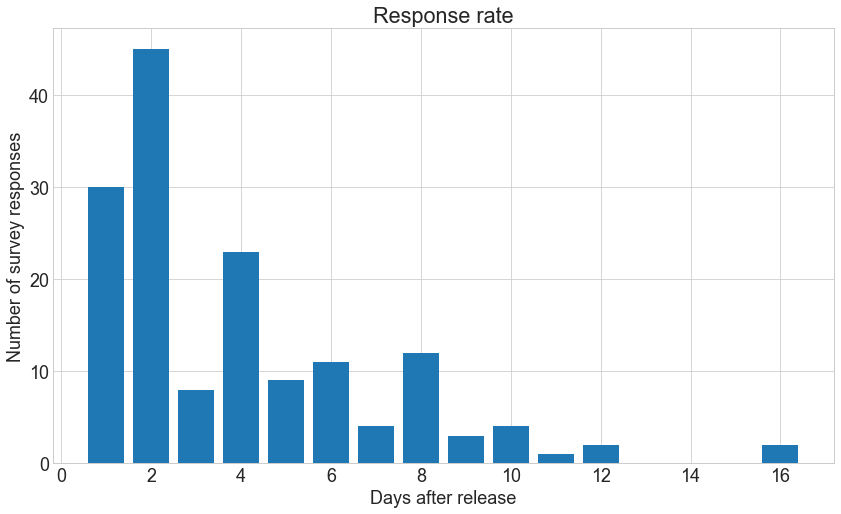

In [19]:
responses = pd.read_excel(r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\test2.xlsx')
#print(responses)

df = pd.DataFrame(responses, columns= ['Real day','Freq'])
display(df)

day = []
freq = []

start = datetime.date(21,3,22)
start = float(start.strftime('%d'))
counter = date.today()
counter = float(counter.strftime('%d'))

n = int(start - 21.0 + 9.0 + counter) 

print("Number of days survey has been released:",n)

for idx in range(0,n):
    
    day.append(df['Real day'][idx])
    freq.append(df['Freq'][idx])

f, ax = plt.subplots(figsize=(14,8))

ax.bar(day,freq)
ax.set_xlabel('Days after release')
ax.set_ylabel('Number of survey responses')
ax.set_title('Response rate')
plt.savefig("Response rate prelim.jpg")

## Archived success rate - n = 0, n = 1, n =2, and combined three

Now, we have sorted all the data, ready for analysis/processing and then plotting.

What I've done below is saved the newest versions of each database to text files so that they can be recovered. Then, I'm sorting by the number of transits, so we obtain 3 graphs for transit_n = 0, 1 and 2. 

In [49]:
display(df_sound,df_visual,df_video)

np.savetxt(r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\df_sound.txt', df_sound, fmt='%s')
np.savetxt(r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\df_visual.txt', df_visual, fmt='%s')
np.savetxt(r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\df_video.txt', df_video, fmt='%s')

,Name,Correct n,Number of correct answers,Total responses,SNR
0,Here is the link to sonification 91: https://d...,1,1,30,3
1,Here is the link to sonification 174: https://...,0,24,30,100
2,Here is the link to sonification 49: https://d...,2,3,30,5
3,Here is the link to sonification 10: https://d...,1,27,30,30
4,Here is the link to sonification 64: https://d...,1,10,30,10
5,Here is the link to sonification 168: https://...,0,20,26,30
6,Here is the link to sonification 36: https://d...,2,24,26,30
7,Here is the link to sonification 17: https://d...,1,2,26,5
8,Here is the link to sonification 111: https://...,0,13,20,10
9,Here is the link to sonification 71: https://d...,2,19,20,100


,Name,Correct n,Number of correct answers,Total responses,SNR
0,Here is the link to plot 111: https://drive.go...,0,23,30,10
1,Here is the link to plot 71: https://drive.goo...,2,28,30,100
2,Here is the link to plot 91: https://drive.goo...,1,0,30,3
3,Here is the link to plot 161: https://drive.go...,0,20,25,7
4,Here is the link to plot 28: https://drive.goo...,1,24,26,7
5,Here is the link to plot 49: https://drive.goo...,2,10,26,5
6,Here is the link to plot 110: https://drive.go...,0,22,26,3
7,Here is the link to plot 15: https://drive.goo...,2,14,26,7
8,Here is the link to plot 64: https://drive.goo...,1,13,20,10
9,Here is the link to plot 17: https://drive.goo...,1,2,20,5


,Name,Correct n,Number of correct answers,Total responses,SNR
0,Here is the link to video 110: https://drive.g...,0,22,30,3
1,Here is the link to video 49: https://drive.go...,2,9,26,5
2,Here is the link to video 91: https://drive.go...,1,0,20,3
3,Here is the link to video 64: https://drive.go...,1,15,20,10
4,Here is the link to video 15: https://drive.go...,2,14,20,7
5,Here is the link to video 28: https://drive.go...,1,15,20,7
6,Here is the link to video 18: https://drive.go...,2,0,29,3
7,Here is the link to video 36: https://drive.go...,2,29,29,30
8,Here is the link to video 59: https://drive.go...,1,29,29,100
9,Here is the link to video 174: https://drive.g...,0,26,29,100


Getting database names as strings and sorting by transit n:

['df_sound', 'df_visual', 'df_video']


,Name,Correct n,Number of correct answers,Total responses,SNR
8,Here is the link to sonification 111: https://...,0,13,20,10
14,Here is the link to sonification 161: https://...,0,19,22,7
10,Here is the link to sonification 123: https://...,0,16,20,5
5,Here is the link to sonification 168: https://...,0,20,26,30
17,Here is the link to sonification 110: https://...,0,17,22,3
1,Here is the link to sonification 174: https://...,0,24,30,100
3,Here is the link to sonification 10: https://d...,1,27,30,30
7,Here is the link to sonification 17: https://d...,1,2,26,5
16,Here is the link to sonification 59: https://d...,1,22,22,100
12,Here is the link to sonification 28: https://d...,1,9,29,7


,Name,Correct n,Number of correct answers,Total responses,SNR
0,Here is the link to plot 111: https://drive.go...,0,23,30,10
14,Here is the link to plot 174: https://drive.go...,0,18,22,100
13,Here is the link to plot 123: https://drive.go...,0,18,22,5
3,Here is the link to plot 161: https://drive.go...,0,20,25,7
6,Here is the link to plot 110: https://drive.go...,0,22,26,3
16,Here is the link to plot 168: https://drive.go...,0,17,22,30
12,Here is the link to plot 59: https://drive.goo...,1,20,22,100
10,Here is the link to plot 10: https://drive.goo...,1,29,29,30
9,Here is the link to plot 17: https://drive.goo...,1,2,20,5
8,Here is the link to plot 64: https://drive.goo...,1,13,20,10


,Name,Correct n,Number of correct answers,Total responses,SNR
0,Here is the link to video 110: https://drive.g...,0,22,30,3
15,Here is the link to video 111: https://drive.g...,0,19,22,10
12,Here is the link to video 168: https://drive.g...,0,16,22,30
11,Here is the link to video 161: https://drive.g...,0,28,29,7
10,Here is the link to video 123: https://drive.g...,0,27,29,5
9,Here is the link to video 174: https://drive.g...,0,26,29,100
14,Here is the link to video 10: https://drive.go...,1,21,22,30
13,Here is the link to video 17: https://drive.go...,1,1,22,5
8,Here is the link to video 59: https://drive.go...,1,29,29,100
5,Here is the link to video 28: https://drive.go...,1,15,20,7


n = 1 and 2 combined:

In [ ]:
def search_function_12(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    print("I opened", survey_sheet)
    print("")
    
    global success_rates
    global snr
    
    success_rates = []
    snr = []
    
    for i in range(6,15):
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question
        
        for j in range(0,len(df_master['Questions from master'])):
            
            if df_master.iloc[j]['Questions from master'] == question:
                print("I found",question,"in the master")
                print("It's value of snr is",df_master.iloc[j]['snr'])
                print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                print("The responses were",responses)
                
                bool_list = []
                
                for k in responses: ## Success rate calculation here
                    test = list(map(lambda x, y: x == y, df_master.iloc[j]['correct value'], k))
                    bool_list = bool_list + test
                    
                true_count = sum(bool_list)
                perc = true_count/len(bool_list)*100.0

                sorting_hat_success(question,perc)
            
            else:
                continue
                
for x in names:
    search_function_12(x)
    time.sleep(5)

print("Success rates calculated")

n = 0:

,Name,Correct n,Success rate,SNR
8,Here is the link to sonification 111: https://...,0,65.0,10
14,Here is the link to sonification 161: https://...,0,86.36363636363636,7
10,Here is the link to sonification 123: https://...,0,80.0,5
5,Here is the link to sonification 168: https://...,0,80.0,30
17,Here is the link to sonification 110: https://...,0,77.27272727272727,3
1,Here is the link to sonification 174: https://...,0,82.75862068965517,100


,Name,Correct n,Success rate,SNR
0,Here is the link to plot 111: https://drive.go...,0,76.66666666666667,10
14,Here is the link to plot 174: https://drive.go...,0,81.81818181818183,100
13,Here is the link to plot 123: https://drive.go...,0,81.81818181818183,5
3,Here is the link to plot 161: https://drive.go...,0,80.0,7
6,Here is the link to plot 110: https://drive.go...,0,84.61538461538461,3
16,Here is the link to plot 168: https://drive.go...,0,77.27272727272727,30


,Name,Correct n,Success rate,SNR
0,Here is the link to video 110: https://drive.g...,0,75.86206896551724,3
15,Here is the link to video 111: https://drive.g...,0,86.36363636363636,10
12,Here is the link to video 168: https://drive.g...,0,72.72727272727273,30
11,Here is the link to video 161: https://drive.g...,0,100.0,7
10,Here is the link to video 123: https://drive.g...,0,93.10344827586206,5
9,Here is the link to video 174: https://drive.g...,0,92.85714285714286,100


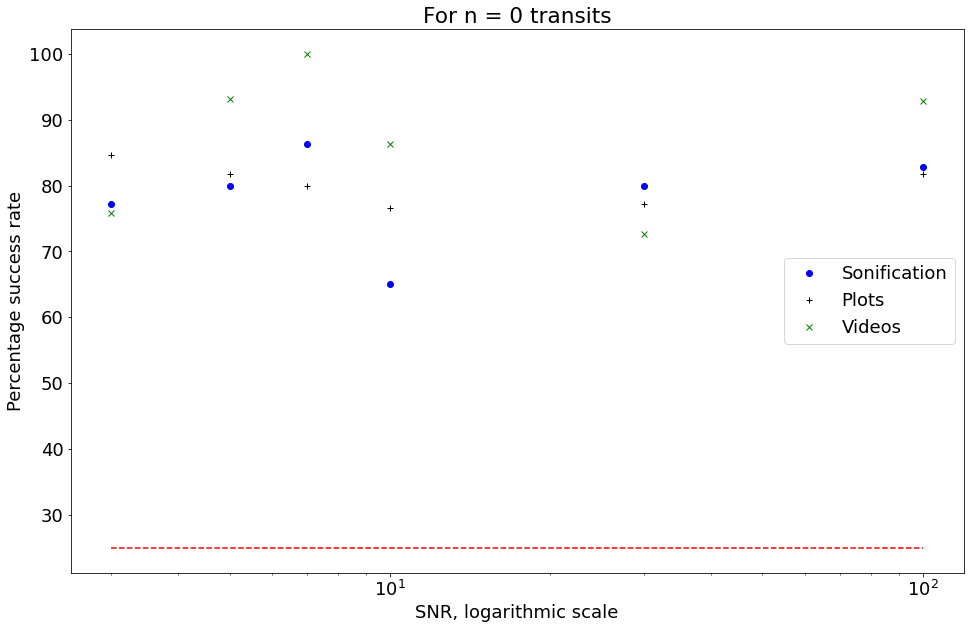

n = 1:

,Name,Correct n,Success rate,SNR
3,Here is the link to sonification 10: https://d...,1,89.65517241379311,30
7,Here is the link to sonification 17: https://d...,1,8.0,5
16,Here is the link to sonification 59: https://d...,1,100.0,100
12,Here is the link to sonification 28: https://d...,1,33.33333333333333,7
4,Here is the link to sonification 64: https://d...,1,31.03448275862069,10
0,Here is the link to sonification 91: https://d...,1,0.0,3


,Name,Correct n,Success rate,SNR
12,Here is the link to plot 59: https://drive.goo...,1,90.9090909090909,100
10,Here is the link to plot 10: https://drive.goo...,1,100.0,30
9,Here is the link to plot 17: https://drive.goo...,1,10.0,5
8,Here is the link to plot 64: https://drive.goo...,1,65.0,10
4,Here is the link to plot 28: https://drive.goo...,1,95.83333333333334,7
2,Here is the link to plot 91: https://drive.goo...,1,0.0,3


,Name,Correct n,Success rate,SNR
14,Here is the link to video 10: https://drive.go...,1,100.0,30
13,Here is the link to video 17: https://drive.go...,1,4.761904761904762,5
8,Here is the link to video 59: https://drive.go...,1,100.0,100
5,Here is the link to video 28: https://drive.go...,1,75.0,7
3,Here is the link to video 64: https://drive.go...,1,75.0,10
2,Here is the link to video 91: https://drive.go...,1,0.0,3


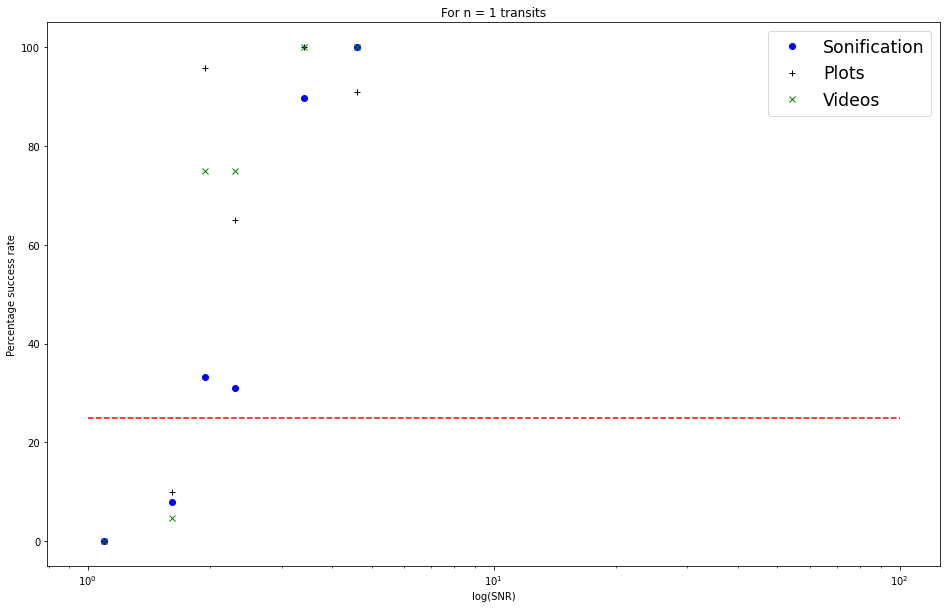

In [55]:
n1_snr_sound = []
n1_snr_visual = []
n1_snr_video = []
n1_success_sound = []
n1_success_visual = []
n1_success_video = []

for i in sets['Data']:
    
    
    j = i.iloc[6:12]
    display(j)
    
    if "sonification" in j.iloc[0]['Name']: 
    
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n1_snr_sound
        global n1_success_sound

        for k in range(0,len(x)):
            n1_snr_sound.append(float(x[k]))
            n1_success_sound.append(float(y[k]))
            
    elif "plot" in j.iloc[0]['Name']:
        
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n1_snr_visual
        global n1_success_visual

        for k in range(0,len(x)):
            n1_snr_visual.append(float(x[k]))
            n1_success_visual.append(float(y[k]))
    
    else:
        
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n1_snr_video
        global n1_success_video

        for k in range(0,len(x)):
            n1_snr_video.append(float(x[k]))
            n1_success_video.append(float(y[k]))
        
    
f, ax = plt.subplots(figsize=(16, 10))
plt.plot(np.log(n1_snr_sound),n1_success_sound,'bo', label='Sonification')
plt.plot(np.log(n1_snr_visual),n1_success_visual,'k+', label='Plots')
plt.plot(np.log(n1_snr_video),n1_success_video,'gx', label='Videos')
plt.legend(loc="best",fontsize='xx-large')
plt.xscale("log")
plt.hlines(25, 1, 100, colors='k', linestyles='dashed', label='',color='red')
ax.set_xlabel("log(SNR)")
ax.set_ylabel("Percentage success rate")
ax.set_title("For n = 1 transits")

plt.savefig("n = 1 transits prelim")

n = 2:

,Name,Correct n,Success rate,SNR
6,Here is the link to sonification 36: https://d...,2,96.0,30
9,Here is the link to sonification 71: https://d...,2,95.0,100
2,Here is the link to sonification 49: https://d...,2,6.896551724137931,5
11,Here is the link to sonification 94: https://d...,2,25.0,10
13,Here is the link to sonification 15: https://d...,2,13.636363636363635,7
15,Here is the link to sonification 18: https://d...,2,13.636363636363635,3


,Name,Correct n,Success rate,SNR
5,Here is the link to plot 49: https://drive.goo...,2,36.0,5
11,Here is the link to plot 18: https://drive.goo...,2,9.090909090909092,3
1,Here is the link to plot 71: https://drive.goo...,2,93.10344827586206,100
15,Here is the link to plot 36: https://drive.goo...,2,95.45454545454545,30
7,Here is the link to plot 15: https://drive.goo...,2,52.0,7
17,Here is the link to plot 94: https://drive.goo...,2,57.14285714285714,10


,Name,Correct n,Success rate,SNR
7,Here is the link to video 36: https://drive.go...,2,100.0,30
6,Here is the link to video 18: https://drive.go...,2,0.0,3
4,Here is the link to video 15: https://drive.go...,2,70.0,7
1,Here is the link to video 49: https://drive.go...,2,32.0,5
16,Here is the link to video 71: https://drive.go...,2,100.0,100
17,Here is the link to video 94: https://drive.go...,2,28.57142857142857,10


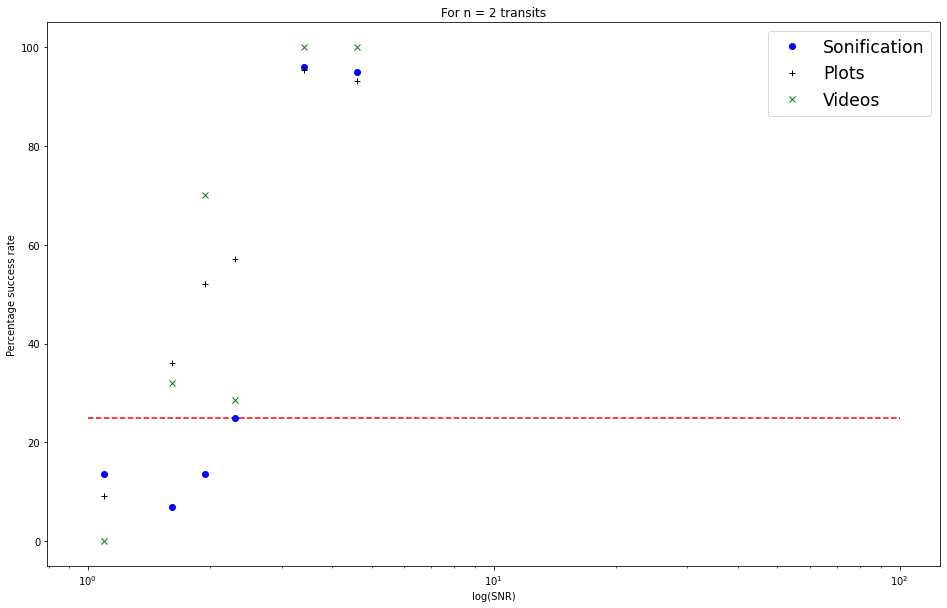

In [54]:
n2_snr_sound = []
n2_snr_visual = []
n2_snr_video = []
n2_success_sound = []
n2_success_visual = []
n2_success_video = []

for i in sets['Data']:
    
    
    j = i.iloc[12:18]
    display(j)
    
    if "sonification" in j.iloc[0]['Name']: 
    
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n2_snr_sound
        global n2_success_sound

        for k in range(0,len(x)):
            n2_snr_sound.append(float(x[k]))
            n2_success_sound.append(float(y[k]))
            
    elif "plot" in j.iloc[0]['Name']:
        
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n2_snr_visual
        global n2_success_visual

        for k in range(0,len(x)):
            n2_snr_visual.append(float(x[k]))
            n2_success_visual.append(float(y[k]))
    
    else:
        
        x = j['SNR'].tolist()
        y = j['Success rate'].tolist()

        global n2_snr_video
        global n2_success_video

        for k in range(0,len(x)):
            n2_snr_video.append(float(x[k]))
            n2_success_video.append(float(y[k]))
        
    
f, ax = plt.subplots(figsize=(16, 10))
plt.plot(np.log(n2_snr_sound),n2_success_sound,'bo', label='Sonification')
plt.plot(np.log(n2_snr_visual),n2_success_visual,'k+', label='Plots')
plt.plot(np.log(n2_snr_video),n2_success_video,'gx', label='Videos')
plt.legend(loc="best",fontsize='xx-large')
ax.set_xlabel("log(SNR)")
plt.hlines(25, 1, 100, colors='k', linestyles='dashed', label='',color='red')
plt.xscale("log")
ax.set_ylabel("Percentage success rate")
ax.set_title("For n = 2 transits")

plt.savefig("n = 2 transits prelim")

Combining n = 1 and 2 datasets

In [143]:
def sort_snr(df):
    df.sort_values(by=['SNR'],ascending=True,inplace=True,ignore_index=True)
    
for i in sets['Data']:
    
    j = i.iloc[6:18]
    display(j)
    
    if len(j['Name']) != 12:
        
        print("Error")
        
    else:
        sort_snr(j)
        display(j)
    #k.append(j)

#del comb
#comb = pd.concat(k)
#display(comb)

,Name,Correct n,Success rate,SNR
3,Here is the link to sonification 10: https://d...,1,90.0,30
7,Here is the link to sonification 17: https://d...,1,7.6923076923076925,5
16,Here is the link to sonification 59: https://d...,1,100.0,100
12,Here is the link to sonification 28: https://d...,1,32.142857142857146,7
4,Here is the link to sonification 64: https://d...,1,33.33333333333333,10
0,Here is the link to sonification 91: https://d...,1,3.3333333333333335,3
6,Here is the link to sonification 36: https://d...,2,92.3076923076923,30
9,Here is the link to sonification 71: https://d...,2,95.0,100
2,Here is the link to sonification 49: https://d...,2,10.0,5
11,Here is the link to sonification 94: https://d...,2,24.137931034482758,10


<ipython-input-143-892f301dccd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'],ascending=True,inplace=True,ignore_index=True)


,Name,Correct n,Success rate,SNR
0,Here is the link to sonification 64: https://d...,1,33.33333333333333,10
1,Here is the link to sonification 94: https://d...,2,24.137931034482758,10
2,Here is the link to sonification 59: https://d...,1,100.0,100
3,Here is the link to sonification 71: https://d...,2,95.0,100
4,Here is the link to sonification 91: https://d...,1,3.3333333333333335,3
5,Here is the link to sonification 18: https://d...,2,13.636363636363635,3
6,Here is the link to sonification 10: https://d...,1,90.0,30
7,Here is the link to sonification 36: https://d...,2,92.3076923076923,30
8,Here is the link to sonification 17: https://d...,1,7.6923076923076925,5
9,Here is the link to sonification 49: https://d...,2,10.0,5


,Name,Correct n,Success rate,SNR
12,Here is the link to plot 59: https://drive.goo...,1,90.9090909090909,100
10,Here is the link to plot 10: https://drive.goo...,1,100.0,30
9,Here is the link to plot 17: https://drive.goo...,1,10.0,5
8,Here is the link to plot 64: https://drive.goo...,1,65.0,10
4,Here is the link to plot 28: https://drive.goo...,1,96.0,7
2,Here is the link to plot 91: https://drive.goo...,1,0.0,3
5,Here is the link to plot 49: https://drive.goo...,2,38.46153846153847,5
11,Here is the link to plot 18: https://drive.goo...,2,9.090909090909092,3
1,Here is the link to plot 71: https://drive.goo...,2,93.33333333333333,100
15,Here is the link to plot 36: https://drive.goo...,2,95.45454545454545,30


<ipython-input-143-892f301dccd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'],ascending=True,inplace=True,ignore_index=True)


,Name,Correct n,Success rate,SNR
0,Here is the link to plot 64: https://drive.goo...,1,65.0,10
1,Here is the link to plot 94: https://drive.goo...,2,54.54545454545454,10
2,Here is the link to plot 59: https://drive.goo...,1,90.9090909090909,100
3,Here is the link to plot 71: https://drive.goo...,2,93.33333333333333,100
4,Here is the link to plot 91: https://drive.goo...,1,0.0,3
5,Here is the link to plot 18: https://drive.goo...,2,9.090909090909092,3
6,Here is the link to plot 10: https://drive.goo...,1,100.0,30
7,Here is the link to plot 36: https://drive.goo...,2,95.45454545454545,30
8,Here is the link to plot 17: https://drive.goo...,1,10.0,5
9,Here is the link to plot 49: https://drive.goo...,2,38.46153846153847,5


,Name,Correct n,Success rate,SNR
14,Here is the link to video 10: https://drive.go...,1,100.0,30
13,Here is the link to video 17: https://drive.go...,1,4.545454545454546,5
8,Here is the link to video 59: https://drive.go...,1,100.0,100
5,Here is the link to video 28: https://drive.go...,1,75.0,7
3,Here is the link to video 64: https://drive.go...,1,75.0,10
2,Here is the link to video 91: https://drive.go...,1,0.0,3
7,Here is the link to video 36: https://drive.go...,2,100.0,30
6,Here is the link to video 18: https://drive.go...,2,0.0,3
4,Here is the link to video 15: https://drive.go...,2,70.0,7
1,Here is the link to video 49: https://drive.go...,2,34.61538461538461,5


<ipython-input-143-892f301dccd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'],ascending=True,inplace=True,ignore_index=True)


,Name,Correct n,Success rate,SNR
0,Here is the link to video 64: https://drive.go...,1,75.0,10
1,Here is the link to video 94: https://drive.go...,2,27.27272727272727,10
2,Here is the link to video 59: https://drive.go...,1,100.0,100
3,Here is the link to video 71: https://drive.go...,2,100.0,100
4,Here is the link to video 91: https://drive.go...,1,0.0,3
5,Here is the link to video 18: https://drive.go...,2,0.0,3
6,Here is the link to video 10: https://drive.go...,1,100.0,30
7,Here is the link to video 36: https://drive.go...,2,100.0,30
8,Here is the link to video 17: https://drive.go...,1,4.545454545454546,5
9,Here is the link to video 49: https://drive.go...,2,34.61538461538461,5


Combined plot for n = 0, 1 and 2

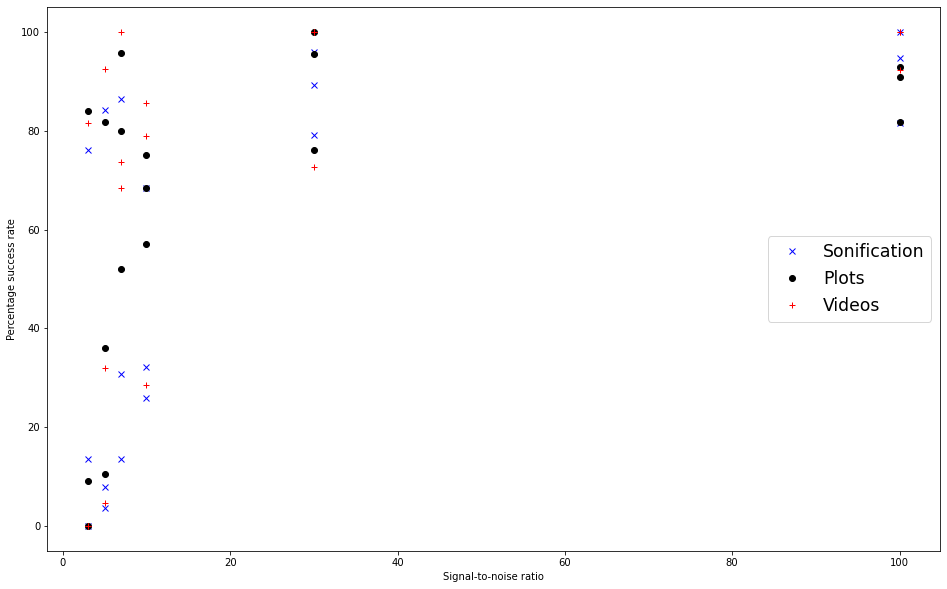

In [30]:
x1 = df_sound["SNR"].tolist()
x_sound = []
for idx in x1:
    x_sound.append(float(idx))

y1 = df_sound['Success rate'].tolist()
y_sound = []
for idx in y1:
    y_sound.append(float(idx))

    
x2 = df_visual['SNR'].tolist()
x_visual = []
for idx in x2:
    x_visual.append(float(idx))
    
y2 = df_visual['Success rate'].tolist()
y_visual = []
for idx in y2:
    y_visual.append(float(idx))
    

x3 = df_video['SNR']
x_video = []
for idx in x3:
    x_video.append(float(idx))
    
y3 = df_video['Success rate']
y_video = []
for idx in y3:
    y_video.append(float(idx))
    

f, ax = plt.subplots(figsize=(16, 10))
plt.plot(x_sound,y_sound,'bx', label='Sonification')
plt.plot(x_visual,y_visual,'ko', label='Plots')
plt.plot(x_video,y_video,'r+', label='Videos')
plt.legend(loc="right",fontsize='xx-large')
ax.set_xlabel("Signal-to-noise ratio")
ax.set_ylabel("Percentage success rate")

plt.savefig("prelim data.jpg")


Kolgorov-Smirnov testing

In [32]:
from scipy import stats
stats.kstest(y_video, 'randint')
#print(n2_success_sound)

TypeError: _parse_args() missing 2 required positional arguments: 'low' and 'high'